## Assignment : 14

<pre>
1. You can work with preprocessed_data.csv for the assignment. You can get the data from - <a href='https://drive.google.com/drive/u/0/folders/1CJnItndeSSJu7aragQoXWZS9-0apN6pp'>Data folder </a>
2. Load the data in your notebook.
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a  href='https://stackoverflow.com/a/46844409'>this</a> and <a  href='https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum.
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in a separate pad and write your observations about them.
8. Make sure that you are using GPU to train the given models.
</pre>

In [1]:
#you can use gdown modules to import dataset for the assignment
#for importing any file from drive to Colab you can write the syntax as !gdown --id file_id
#you can run the below cell to import the required preprocessed data.csv file and glove vector

In [2]:
#!gdown --id 1GpATd_pM4mcnWWIs28-s1lgqdAg2Wdv-
#!gdown --id 1pGd5tLwA30M7wkbJKdXHaae9tYVDICJ_

## <font color='red'> Model-1 </font>
Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [3]:
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
#input_layer = Input(shape=(n,))
#embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
#flatten = Flatten()(embedding)

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

# <font color='red'> Model-1 </font>

In [1]:
# import all the libraries
#make sure that you import your libraries from tf.keras and not just keras
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,LSTM, Dense,Activation, Dropout, Embedding, Conv1D, Concatenate, Flatten 
from tensorflow.keras.layers import BatchNormalization, SpatialDropout1D

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.utils import plot_model
import datetime
from sklearn.metrics import roc_auc_score
from tensorflow.keras.utils import to_categorical
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import seaborn as sns
import os
from scipy.sparse import hstack
%load_ext tensorboard

In [2]:
#read the csv file
import pandas as pd
df = pd.read_csv('preprocessed_data.csv')

In [3]:
# perform stratified train test split on the dataset
df.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [4]:
y = df['project_is_approved'].values
X = df.drop(['project_is_approved'], axis = 1)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X , y, test_size = 0.25 , stratify = y)

In [6]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [7]:
x_train.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
50356,wi,ms,grades_9_12,5,history_civics music_arts,socialsciences visualarts,i work high poverty area city milwaukee the sc...,129.50
108124,ca,ms,grades_3_5,7,music_arts,music performingarts,we small k 8 title i public school heart oakla...,264.98
107343,mi,mrs,grades_prek_2,1,appliedlearning specialneeds,earlydevelopment specialneeds,our classroom serves kids within around grand ...,195.76
19811,wa,mrs,grades_3_5,0,literacy_language,literacy,as teacher low income high poverty school dist...,313.03
68349,ct,ms,grades_prek_2,4,literacy_language math_science,literature_writing mathematics,my students group 24 amazing children walk cla...,348.13


In [8]:
#Using predefined glove_vectors where each word is represented using 300 dimensions
import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)

### General Functions for all 3 models:

In [9]:
#Code is copied from: https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html
def encoding (category):
    
    ordinal_enc = OrdinalEncoder(categories='auto', handle_unknown='use_encoded_value', unknown_value=999)
    ordinal_enc.fit(x_train[category].values.reshape(-1,1))
    train_category = ordinal_enc.transform(x_train[category].values.reshape(-1,1))
    test_category = ordinal_enc.transform(x_test[category].values.reshape(-1,1))
    
    return train_category, test_category



In [10]:
# https://towardsdatascience.com/deep-embeddings-for-categorical-variables-cat2vec-b05c8ab63ac0
def embedding_input_dim_output_dim(encoded_category):
    input_dimensions = int(len(np.unique(encoded_category)))
    output_dimensions = int(min(50, (input_dimensions// 2)+1))
    return input_dimensions,output_dimensions

In [11]:
# https://stackoverflow.com/questions/57574501/how-to-use-sklearn-auc-in-tensorflow-keras-model-metrics
def auc_2(y_true, y_pred):
    return tf.numpy_function(auc_score, (y_true, y_pred), tf.double)

def auc_score(y_true, y_pred):
    if len(np.unique(y_true[:,0])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)


## 1.1 Text Vectorization

In [40]:
#since the data is already preprocessed, we can directly move to vectorization part
#first we will vectorize the text data
#for vectorization of text data in deep learning we use tokenizer, you can go through below references
# https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html
#https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do
# after text vectorization you should get train_padded_docs and test_padded_docs

### 1.1.1 Vectorizing essay

In [41]:
#Code is copied from: https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html

#oov_token = '<UNK>'
pad_type = 'post'
trunc_type = 'post'

tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')  # Removed '_' from filters
tokenizer.fit_on_texts(x_train['essay'])


# Encode training data sentences into sequences
train_sequences = tokenizer.texts_to_sequences(x_train['essay'])

# Get max training sequence length
maxlen = max([len(x) for x in train_sequences])

# Pad the training sequences
train_padded_essay = pad_sequences(train_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

test_sequences = tokenizer.texts_to_sequences(x_test['essay'])
test_padded_essay = pad_sequences(test_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)



In [42]:
vocab = tokenizer.word_index
#https://datascience.stackexchange.com/questions/93651/reason-for-adding-1-to-word-index-for-sequence-modeling
vocab_size = len(vocab)+1 # word_index starts with index 1. Last word in word_index has index = len(vocab)
                          # Normally index always starts at zero. So, to access the last word in word_index
                          # we need to specify vocab_size = len(vocab) + 1

In [43]:
vocab_size

50344

In [44]:
print(train_padded_essay.shape)
print(test_padded_essay.shape)

(81936, 339)
(27312, 339)


In [45]:
#after getting the padded_docs you have to use predefined glove vectors to get 300 dim representation for each word
# we will be storing this data in form of an embedding matrix and will use it while defining our model
# Please go through following blog's 'Example of Using Pre-Trained GloVe Embedding' section to understand how to create embedding matrix
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [46]:
embedding_matrix = np.zeros((vocab_size, 300))  # We used 300 dimensional pre-defined glove word embedding vectors
for word, i in vocab.items():
    embedding_vector = model.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [47]:
embedding_matrix.shape

(50344, 300)

## 1.2 Categorical feature Vectorization

In [27]:
# for model 1 and model 2, we have to assign a unique number to each feature in a particular categorical column.
# you can either use tokenizer,label encoder or ordinal encoder to perform the task
# label encoder gives an error for 'unseen values' (values present in test but not in train)
# handle unseen values with label encoder - https://stackoverflow.com/a/56876351
# ordinal encoder also gives error with unseen values but you can use modify handle_unknown parameter
# documentation of ordianl encoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
# after categorical feature vectorization you will have column_train_data and column_test_data.

In [28]:
train_school_state_encoded , test_school_state_encoded = encoding('school_state')
train_teacher_prefix_encoded , test_teacher_prefix_encoded = encoding('teacher_prefix')
train_project_grade_category_encoded , test_project_grade_category_encoded = encoding('project_grade_category')
train_clean_categories_encoded , test_clean_categories_encoded = encoding('clean_categories')
train_clean_subcategories_encoded , test_clean_subcategories_encoded = encoding('clean_subcategories')

In [29]:
print(train_school_state_encoded.shape)
print(train_teacher_prefix_encoded.shape)
print(train_project_grade_category_encoded.shape)
print(train_clean_categories_encoded.shape)
print(train_clean_subcategories_encoded.shape)
print(test_school_state_encoded.shape)
print(test_teacher_prefix_encoded.shape)
print(test_project_grade_category_encoded.shape)
print(test_clean_categories_encoded.shape)
print(test_clean_subcategories_encoded.shape)

(81936, 1)
(81936, 1)
(81936, 1)
(81936, 1)
(81936, 1)
(27312, 1)
(27312, 1)
(27312, 1)
(27312, 1)
(27312, 1)


## 1.3 Numerical feature Vectorization

In [30]:
# you have to standardise the numerical columns
# stack both the numerical features
#after numerical feature vectorization you will have numerical_data_train and numerical_data_test

In [31]:
scaler = StandardScaler()
scaler.fit(x_train['price'].values.reshape(-1,1))

x_train_price_norm = scaler.transform(x_train['price'].values.reshape(-1,1))
x_test_price_norm = scaler.transform(x_test['price'].values.reshape(-1,1))


print("After vectorizations")
print(x_train_price_norm.shape, y_train.shape)
print(x_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(81936, 1) (81936, 1)
(27312, 1) (27312, 1)


In [32]:
scaler = StandardScaler()
scaler.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

x_train_teacher_num_previous_projects_norm =scaler.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_test_teacher_num_previous_projects_norm = scaler.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_teacher_num_previous_projects_norm.shape, y_train.shape)
print(x_test_teacher_num_previous_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(81936, 1) (81936, 1)
(27312, 1) (27312, 1)


In [33]:
train_numerical_features = np.concatenate((x_train_price_norm, x_train_teacher_num_previous_projects_norm),axis=1)
test_numerical_features = np.concatenate((x_test_price_norm, x_test_teacher_num_previous_projects_norm),axis=1)

In [34]:
print(train_numerical_features.shape)
print(test_numerical_features.shape)

(81936, 2)
(27312, 2)


## 1.4 Defining the model

<img src='https://i.imgur.com/w395Yk9.png'>

In [28]:
# as of now we have vectorized all our features now we will define our model.
# as it is clear from above image that the given model has multiple input layers and hence we have to use functional API
# Please go through - https://keras.io/guides/functional_api/
# it is a good programming practise to define your complete model i.e all inputs , intermediate and output layers at one place.
# while defining your model make sure that you use variable names while defining any length,dimension or size.
#for ex.- you should write the code as 'input_text = Input(shape=(pad_length,))' and not as 'input_text = Input(shape=(300,))'
# the embedding layer for text data should be non trainable
# the embedding layer for categorical data should be trainable
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
# https://towardsdatascience.com/deep-embeddings-for-categorical-variables-cat2vec-b05c8ab63ac0
#print model.summary() after you have defined the model
#plot the model using utils.plot_model module and make sure that it is similar to the above image

In [48]:
# input text layer and text embedding layer
tf.keras.backend.clear_session()
input_layer_text = Input(shape=(maxlen),)
embedding_layer_text = Embedding(input_dim = vocab_size, output_dim = 300, weights = [embedding_matrix], 
                            input_length=maxlen, trainable=False) (input_layer_text) # We used 300d 
                                                                                     # glove vector

lstm = LSTM(128, return_sequences = True) (embedding_layer_text)    # return_sequences should be true when stacking
                                                                    # LSTM units in LSTM layer

flat_text = Flatten() (lstm)

# input school state layer and school state embedding layer
input_school_state = Input(shape=(1,))

inp_dim, out_dim = embedding_input_dim_output_dim(train_school_state_encoded)

embedding_layer_school_state = Embedding(input_dim = inp_dim, output_dim = out_dim, 
                            input_length=1, trainable=True) (input_school_state)

flat_school_state = Flatten() (embedding_layer_school_state)


# input project grade category layer and project grade category embedding layer
input_project_grade_category = Input(shape=(1,))

inp_dim, out_dim = embedding_input_dim_output_dim(train_project_grade_category_encoded)

embedding_layer_project_grade_category = Embedding(input_dim = inp_dim, output_dim = out_dim, 
                                         input_length=1, trainable=True) (input_project_grade_category)

flat_project_grade_category = Flatten() (embedding_layer_project_grade_category)

# input clean categories layer and clean categories embedding layer
input_clean_categories = Input(shape=(1,))

inp_dim, out_dim = embedding_input_dim_output_dim(train_clean_categories_encoded)

embedding_layer_clean_categories = Embedding(input_dim = inp_dim, output_dim = out_dim, 
                                         input_length=1, trainable=True) (input_clean_categories)

flat_clean_categories = Flatten() (embedding_layer_clean_categories)

# input clean subcategories layer and clean subcategories embedding layer
input_clean_subcategories = Input(shape=(1,))

inp_dim, out_dim = embedding_input_dim_output_dim(train_clean_subcategories_encoded)

embedding_layer_clean_subcategories = Embedding(input_dim = inp_dim, output_dim = out_dim, 
                                        input_length=1, trainable=True) (input_clean_subcategories)

flat_clean_subcategories = Flatten() (embedding_layer_clean_subcategories)

# input teacher prefix layer and teacher prefix embedding layer
input_teacher_prefix = Input(shape=(1,))

inp_dim, out_dim = embedding_input_dim_output_dim(train_teacher_prefix_encoded)

embedding_layer_teacher_prefix = Embedding(input_dim = inp_dim, output_dim = out_dim, 
                                         input_length=1, trainable=True) (input_teacher_prefix)

flat_teacher_prefix = Flatten() (embedding_layer_teacher_prefix)


# input numerical features layer 
input_numerical_features = Input(shape=(2,))
dense_numerical = Dense(64,activation='relu', kernel_initializer='HeUniform')(input_numerical_features)

concatenate_1 = Concatenate()([flat_text, flat_school_state, flat_project_grade_category, flat_clean_categories, 
                             flat_clean_subcategories, flat_teacher_prefix, dense_numerical])
dense_after_concat_1  = Dense(256,activation='relu', kernel_initializer='HeUniform')(concatenate_1)



dropout_1 = Dropout(0.5) (dense_after_concat_1)


dense_after_concat_2  = Dense(512,activation='relu', kernel_initializer='HeUniform')(dropout_1)

batch_norm = BatchNormalization() (dense_after_concat_2)
dropout_2 = Dropout(0.5) (batch_norm)

dense_after_concat_3 = Dense(512,activation='relu', kernel_initializer='HeUniform')(dropout_2)
output_one = Dense(1,activation='sigmoid')(dense_after_concat_3)

model_one = Model(inputs=[input_layer_text, input_school_state, input_project_grade_category, input_clean_categories,
                          input_clean_subcategories, input_teacher_prefix, input_numerical_features], outputs=output_one)
model_one.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 339)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 339, 300)     15103200    input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1)]          0                                            
______________________________________________________________________________________________

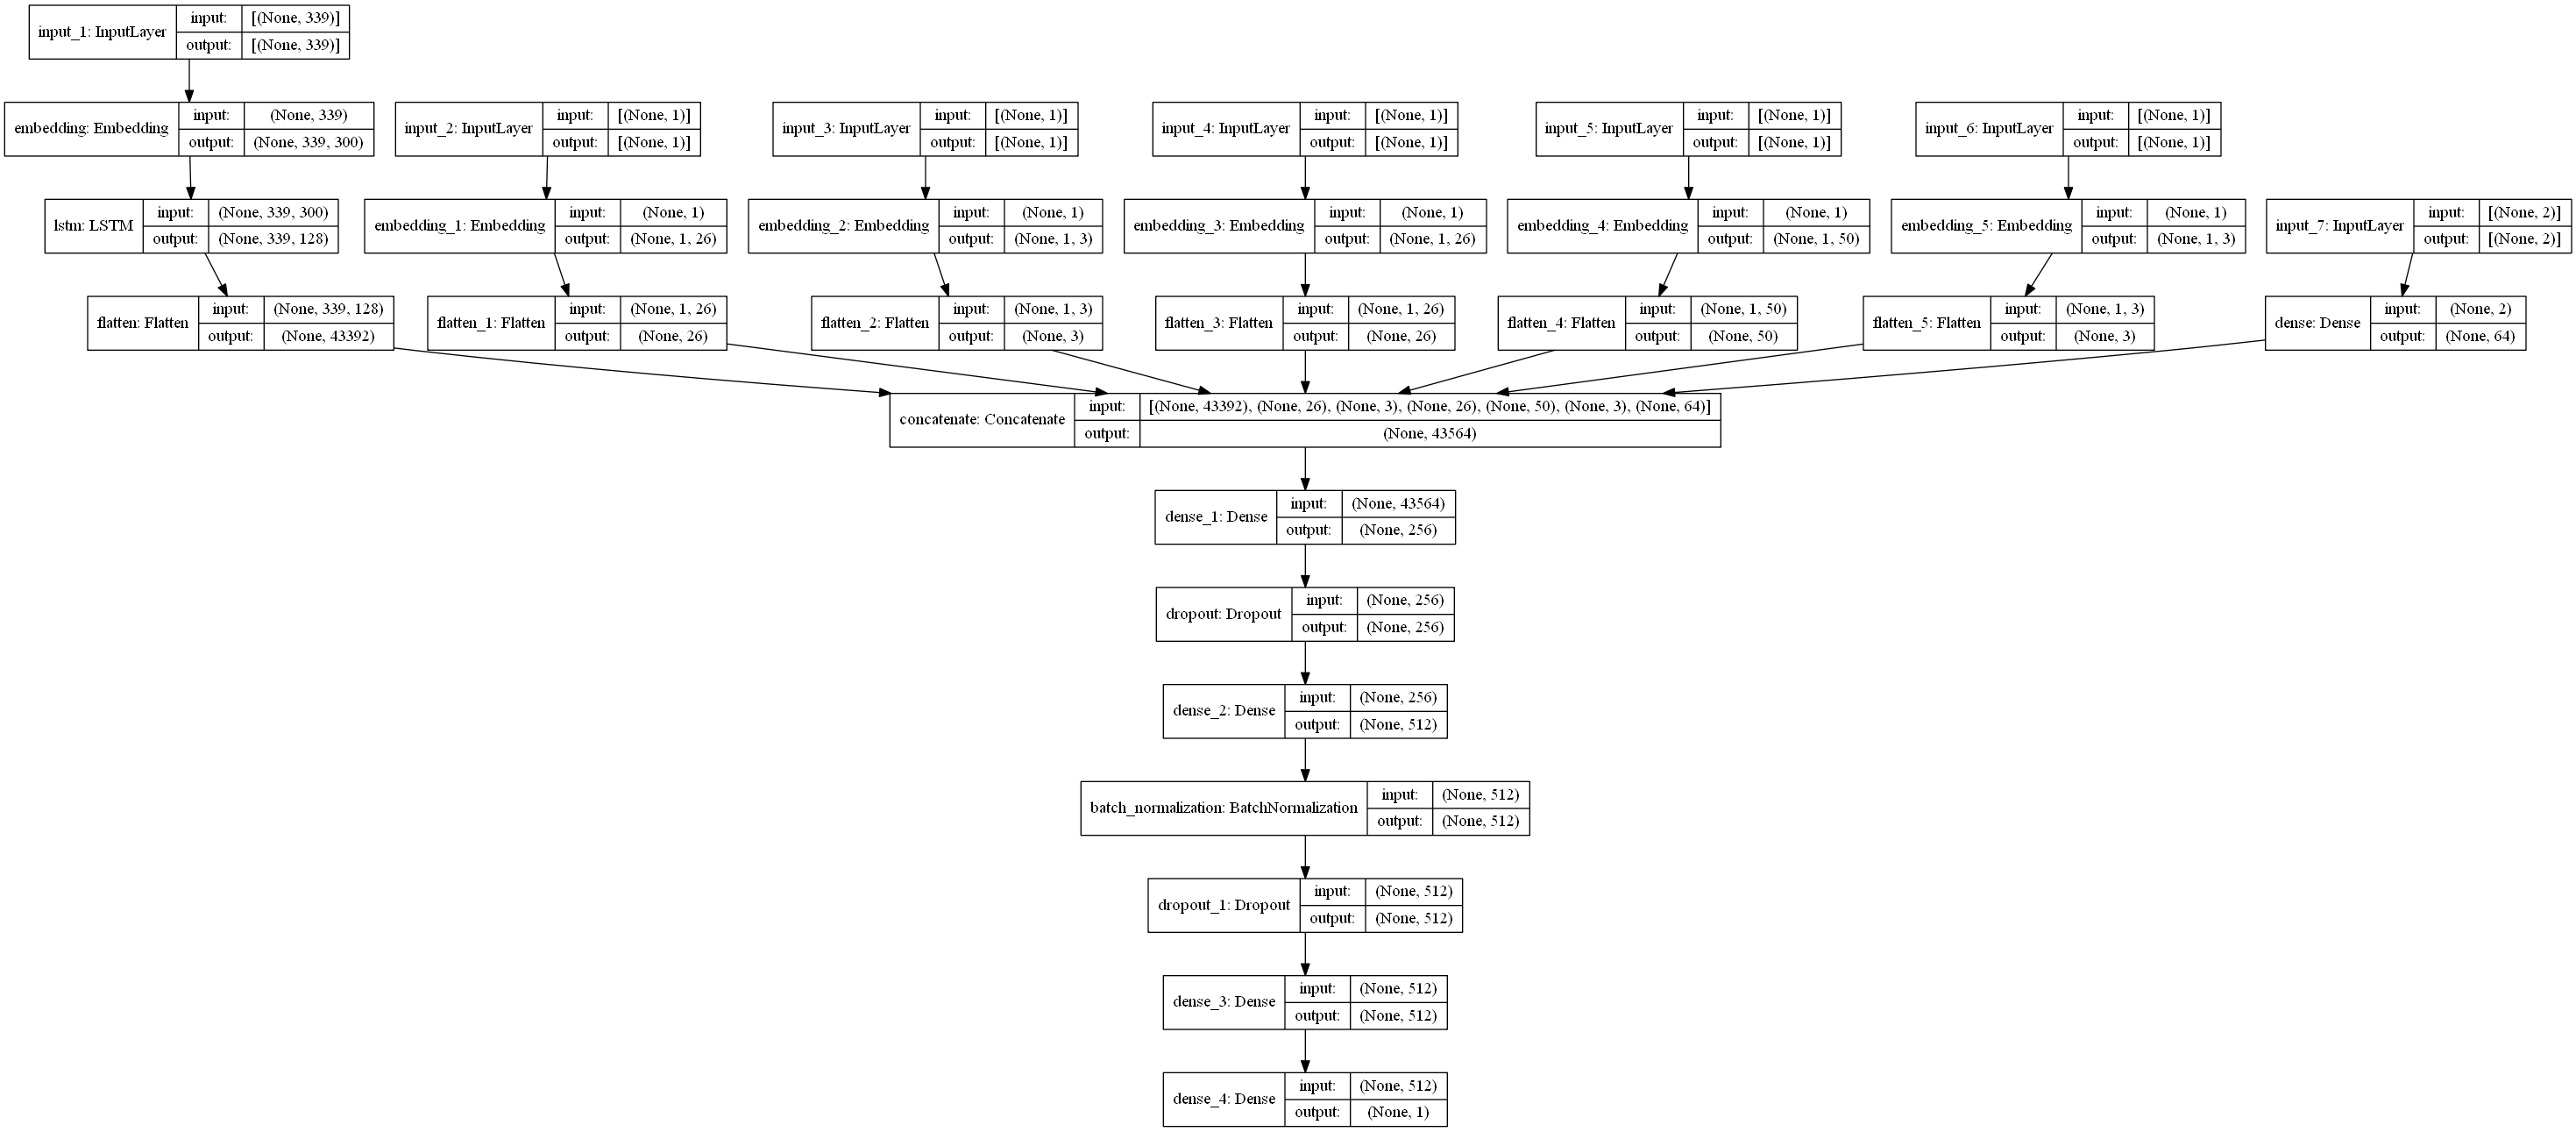

In [49]:
plot_model(model_one, to_file='model_one.png', show_shapes=True)

## 1.5 Compiling and fitting model one

In [50]:
#define custom auc as metric , do not use tf.keras.metrics
# https://stackoverflow.com/a/46844409 - custom AUC reference 1
# https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807  - custom AUC reference 2
# compile and fit your model

In [51]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= ("logs/fits/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) \
                       ,histogram_freq=1,write_graph=True)


filepath="model_save/best_model_one.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_auc_2',  verbose=1, save_best_only=True, mode='max')
# defining mode as 'max' as val_auc_2 is a customm metric and we need to specify how to handle this metric

call_back_list = [tensorboard_callback, checkpoint]

In [52]:
model_one.compile(loss='binary_crossentropy', optimizer='adam',metrics=[auc_2])

train_inp = [train_padded_essay, train_school_state_encoded, train_teacher_prefix_encoded, train_project_grade_category_encoded,
            train_clean_categories_encoded, train_clean_subcategories_encoded, train_numerical_features]

test_inp = [test_padded_essay, test_school_state_encoded, test_teacher_prefix_encoded, test_project_grade_category_encoded,
           test_clean_categories_encoded, test_clean_subcategories_encoded, test_numerical_features]

model_one.fit(train_inp, y_train ,epochs=5, validation_data=(test_inp, y_test), 
              batch_size=512, callbacks=call_back_list)

Epoch 1/5
161/161 [==============================] - 39s 225ms/step - loss: 0.4629 - auc_2: 0.6097 - val_loss: 0.4908 - val_auc_2: 0.7010

Epoch 00001: val_auc_2 improved from -inf to 0.70103, saving model to model_save\best_model_one.hdf5
Epoch 2/5
161/161 [==============================] - 33s 204ms/step - loss: 0.4194 - auc_2: 0.6757 - val_loss: 0.4130 - val_auc_2: 0.7244

Epoch 00002: val_auc_2 improved from 0.70103 to 0.72436, saving model to model_save\best_model_one.hdf5
Epoch 3/5
161/161 [==============================] - 33s 205ms/step - loss: 0.3922 - auc_2: 0.7153 - val_loss: 0.4106 - val_auc_2: 0.7267

Epoch 00003: val_auc_2 improved from 0.72436 to 0.72665, saving model to model_save\best_model_one.hdf5
Epoch 4/5
161/161 [==============================] - 33s 202ms/step - loss: 0.3782 - auc_2: 0.7379 - val_loss: 0.5474 - val_auc_2: 0.7551

Epoch 00004: val_auc_2 improved from 0.72665 to 0.75509, saving model to model_save\best_model_one.hdf5
Epoch 5/5
161/161 [============

#### Our final validation AUC for model one is 0.7618 after 5 epochs

In [37]:
%tensorboard --logdir logs/fits

Reusing TensorBoard on port 6006 (pid 12492), started 17:21:43 ago. (Use '!kill 12492' to kill it.)

### 1.6 Tensorboard image for model one

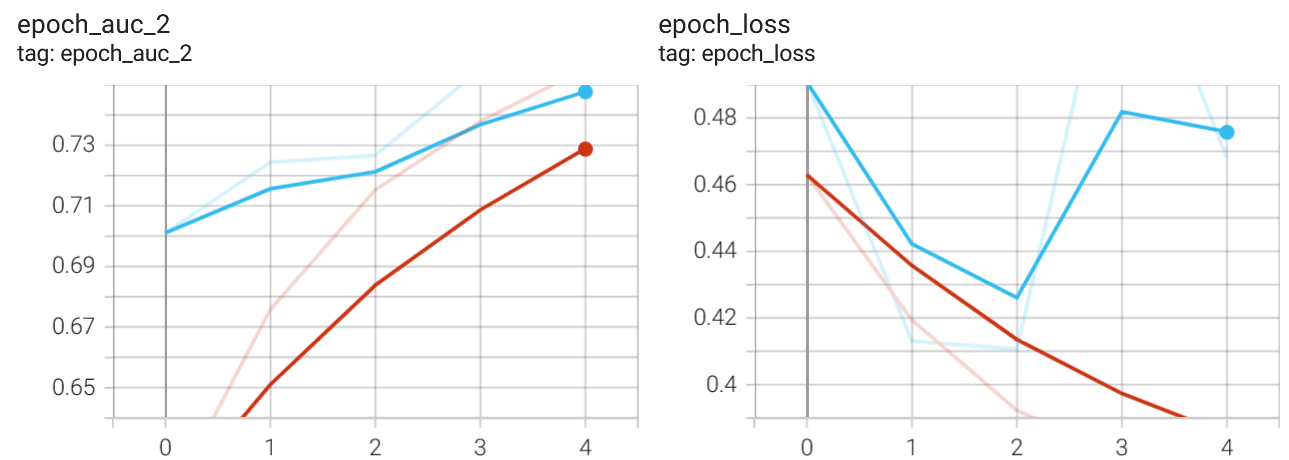

# <font color='red'> Model-2 </font>

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Fit TF-IDF vectorizer on the Train data <br>
2. Get the idf value for each word we have in the train data. Please go through <a  href='https://stackoverflow.com/questions/23792781/tf-idf-feature-weights-using-sklearn-feature-extraction-text-tfidfvectorizer'>this</a><br>

3. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very 
frequent words and very very rare words don't give much information.
Hint - A preferable IDF range is 2-11 for model 2. <br>
4.Remove the low idf value and high idf value words from the train and test data. You can go through each of the
sentence of train and test data and include only those features(words) which are present in the defined IDF range.
5. Perform tokenization on the modified text data same as you have done for previous model.
6. Create embedding matrix for model 2 and then use the rest of the features similar to previous model.
7. Define the model, compile and fit the model.
</pre>

## 2.1 Text Vectorization using top idf words

In [12]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_text= tfidf_vectorizer.fit_transform(x_train['essay'])

In [13]:
idf_text = tfidf_vectorizer.idf_
print(len(idf_text))

50307


<AxesSubplot: >

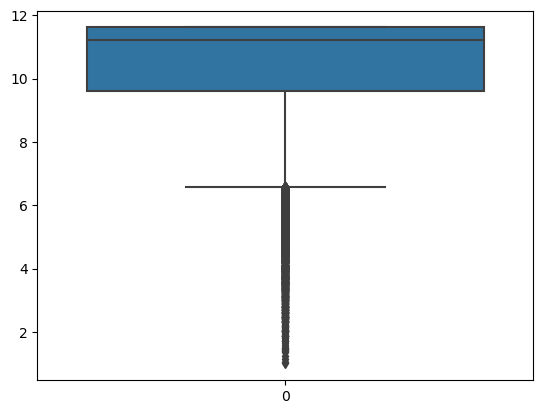

In [14]:
sns.boxplot(idf_text)

In [15]:
for i in range(0,101,10):
    print(" {} percentile idf is {}".format(i, np.percentile(idf_text,i)))

 0 percentile idf is 1.0076693505388723
 10 percentile idf is 7.560115747169021
 20 percentile idf is 9.055609400253903
 30 percentile idf is 10.01112084528134
 40 percentile idf is 10.704268025841285
 50 percentile idf is 11.215093649607276
 60 percentile idf is 11.215093649607276
 70 percentile idf is 11.62055875771544
 80 percentile idf is 11.62055875771544
 90 percentile idf is 11.62055875771544
 100 percentile idf is 11.62055875771544


We can pick the words with idf value between 2 and 11.62

In [17]:
tfidf_words_final = []
for idf_value , word in tqdm(zip(tfidf_vectorizer.idf_ , tfidf_vectorizer.get_feature_names_out())):
    if idf_value >= 2 and idf_value <= 11.62:
        tfidf_words_final.append(word)
print(len(tfidf_words_final))

50307it [00:00, 1733709.52it/s]

30624


In [18]:
def get_final_text(text):
    final_text = " "
    for word in text.split():
        if word in tfidf_words_final:
            final_text = final_text + " " + word
    final_text = final_text.strip()
    return final_text


In [19]:
if not (os.path.isfile('model_two_train_inp.csv') and os.path.isfile('model_two_test_inp.csv')):
    tqdm.pandas()
    x_train['idf_preprocessed_essay'] = x_train['essay'].progress_map(get_final_text)
    x_test['idf_preprocessed_essay'] = x_test['essay'].progress_map(get_final_text)
    x_train.to_csv('model_two_train_inp.csv',index= False)
    x_test.to_csv('model_two_test_inp.csv',index= False)
else:
    x_train = pd.read_csv('model_two_train_inp.csv')
    x_test = pd.read_csv('model_two_test_inp.csv')
    print('idf preprocessed input file is already present')
    

100%|████████████████████████████████████████████████████████████████████████████| 27312/27312 [38:33<00:00, 11.81it/s]


In [53]:
x_train.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,idf_preprocessed_essay
50356,wi,ms,grades_9_12,5,history_civics music_arts,socialsciences visualarts,i work high poverty area city milwaukee the sc...,129.50,high poverty area city milwaukee arts specialt...
108124,ca,ms,grades_3_5,7,music_arts,music performingarts,we small k 8 title i public school heart oakla...,264.98,small title public heart oakland ca serve dive...
107343,mi,mrs,grades_prek_2,1,appliedlearning specialneeds,earlydevelopment specialneeds,our classroom serves kids within around grand ...,195.76,serves kids within around grand rapids area de...
19811,wa,mrs,grades_3_5,0,literacy_language,literacy,as teacher low income high poverty school dist...,313.03,as teacher low income high poverty district fa...
68349,ct,ms,grades_prek_2,4,literacy_language math_science,literature_writing mathematics,my students group 24 amazing children walk cla...,348.13,group 24 amazing children walk different story...


In [21]:
#Code is copied from: https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html

oov_token = '<UNK>'
pad_type = 'post'
trunc_type = 'post'

tokenizer = Tokenizer(oov_token = oov_token, filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')  # Removed '_' from filters
tokenizer.fit_on_texts(x_train['idf_preprocessed_essay'])


# Encode training data sentences into sequences
train_sequences_idf = tokenizer.texts_to_sequences(x_train['idf_preprocessed_essay'])

# Get max training sequence length
maxlen = max([len(x) for x in train_sequences_idf])

# Pad the training sequences
train_padded_essay_idf = pad_sequences(train_sequences_idf, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

test_sequences_idf = tokenizer.texts_to_sequences(x_test['idf_preprocessed_essay'])
test_padded_essay_idf = pad_sequences(test_sequences_idf, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

In [22]:
vocab = tokenizer.word_index
#https://datascience.stackexchange.com/questions/93651/reason-for-adding-1-to-word-index-for-sequence-modeling
vocab_size = len(vocab)+1 # word_index starts with index 1. Last word in word_index has index = len(vocab)
                          # Normally index always starts at zero. So, to access the last word in word_index
                          # we need to specify vocab_size = len(vocab) + 1


In [23]:
vocab_size

30626

In [24]:
print(train_padded_essay_idf.shape)
print(test_padded_essay_idf.shape)

(81936, 290)
(27312, 290)


In [25]:
embedding_matrix = np.zeros((vocab_size, 300))  # We used 300 dimensional pre-defined glove word embedding vectors
for word, i in vocab.items():
    embedding_vector = model.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [26]:
embedding_matrix.shape

(30626, 300)

## 2.2 Defining  model two

In [35]:
# input text layer and text embedding layer
tf.keras.backend.clear_session()
input_layer_idf_preprocessed_text = Input(shape=(maxlen,))
embedding_layer_text = Embedding(input_dim = vocab_size, output_dim = 300, weights = [embedding_matrix], 
                            input_length=maxlen, trainable = False)(input_layer_idf_preprocessed_text) # We used 300d 
                                                                                                       # glove vector
    
lstm = LSTM(128, return_sequences = True) (embedding_layer_text)        # return_sequences should be true when stacking
                                                                        # multiple LSTM units in LSTM layer
flat_text = Flatten() (lstm)

# input school state layer and school state embedding layer
input_school_state = Input(shape=(1,))

inp_dim, out_dim = embedding_input_dim_output_dim(train_school_state_encoded)

embedding_layer_school_state = Embedding(input_dim = inp_dim, output_dim = out_dim, 
                            input_length=1, trainable=True) (input_school_state)

flat_school_state = Flatten() (embedding_layer_school_state)


# input project grade category layer and project grade category embedding layer
input_project_grade_category = Input(shape=(1,))

inp_dim, out_dim = embedding_input_dim_output_dim(train_project_grade_category_encoded)

embedding_layer_project_grade_category = Embedding(input_dim = inp_dim, output_dim = out_dim, 
                                         input_length=1, trainable=True) (input_project_grade_category)

flat_project_grade_category = Flatten() (embedding_layer_project_grade_category)

# input clean categories layer and clean categories embedding layer
input_clean_categories = Input(shape=(1,))

inp_dim, out_dim = embedding_input_dim_output_dim(train_clean_categories_encoded)

embedding_layer_clean_categories = Embedding(input_dim = inp_dim, output_dim = out_dim, 
                                         input_length=1, trainable=True) (input_clean_categories)

flat_clean_categories = Flatten() (embedding_layer_clean_categories)

# input clean subcategories layer and clean subcategories embedding layer
input_clean_subcategories = Input(shape=(1,))

inp_dim, out_dim = embedding_input_dim_output_dim(train_clean_subcategories_encoded)

embedding_layer_clean_subcategories = Embedding(input_dim = inp_dim, output_dim = out_dim, 
                                        input_length=1, trainable=True) (input_clean_subcategories)

flat_clean_subcategories = Flatten() (embedding_layer_clean_subcategories)

# input teacher prefix layer and teacher prefix embedding layer
input_teacher_prefix = Input(shape=(1,))

inp_dim, out_dim = embedding_input_dim_output_dim(train_teacher_prefix_encoded)

embedding_layer_teacher_prefix = Embedding(input_dim = inp_dim, output_dim = out_dim, 
                                         input_length=1, trainable=True) (input_teacher_prefix)

flat_teacher_prefix = Flatten() (embedding_layer_teacher_prefix)


# input numerical features layer 
input_numerical_features = Input(shape=(2,))
dense_numerical = Dense(16,activation='relu', kernel_initializer='HeUniform')(input_numerical_features)

concatenate_1 = Concatenate()([flat_text, flat_school_state, flat_project_grade_category, flat_clean_categories, 
                             flat_clean_subcategories, flat_teacher_prefix, dense_numerical])


dense_after_concat_1 = Dense(256,activation='relu', kernel_initializer='HeUniform')(concatenate_1)




dropout_1 = Dropout(0.5) (dense_after_concat_1)


dense_after_concat_2 = Dense(512,activation= 'relu', kernel_initializer='HeUniform')(dropout_1)


dropout_2 = Dropout(0.5) (dense_after_concat_2)


dense_after_concat_3 = Dense(512,activation= 'relu', kernel_initializer='HeUniform')(dropout_2)


output_two = Dense(1,activation='sigmoid')(dense_after_concat_3)

model_two = Model(inputs=[input_layer_idf_preprocessed_text, input_school_state, input_project_grade_category, 
                          input_clean_categories, input_clean_subcategories, input_teacher_prefix, 
                          input_numerical_features], outputs=output_two)
model_two.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 290)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 290, 300)     9187800     input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1)]          0                                            
______________________________________________________________________________________________

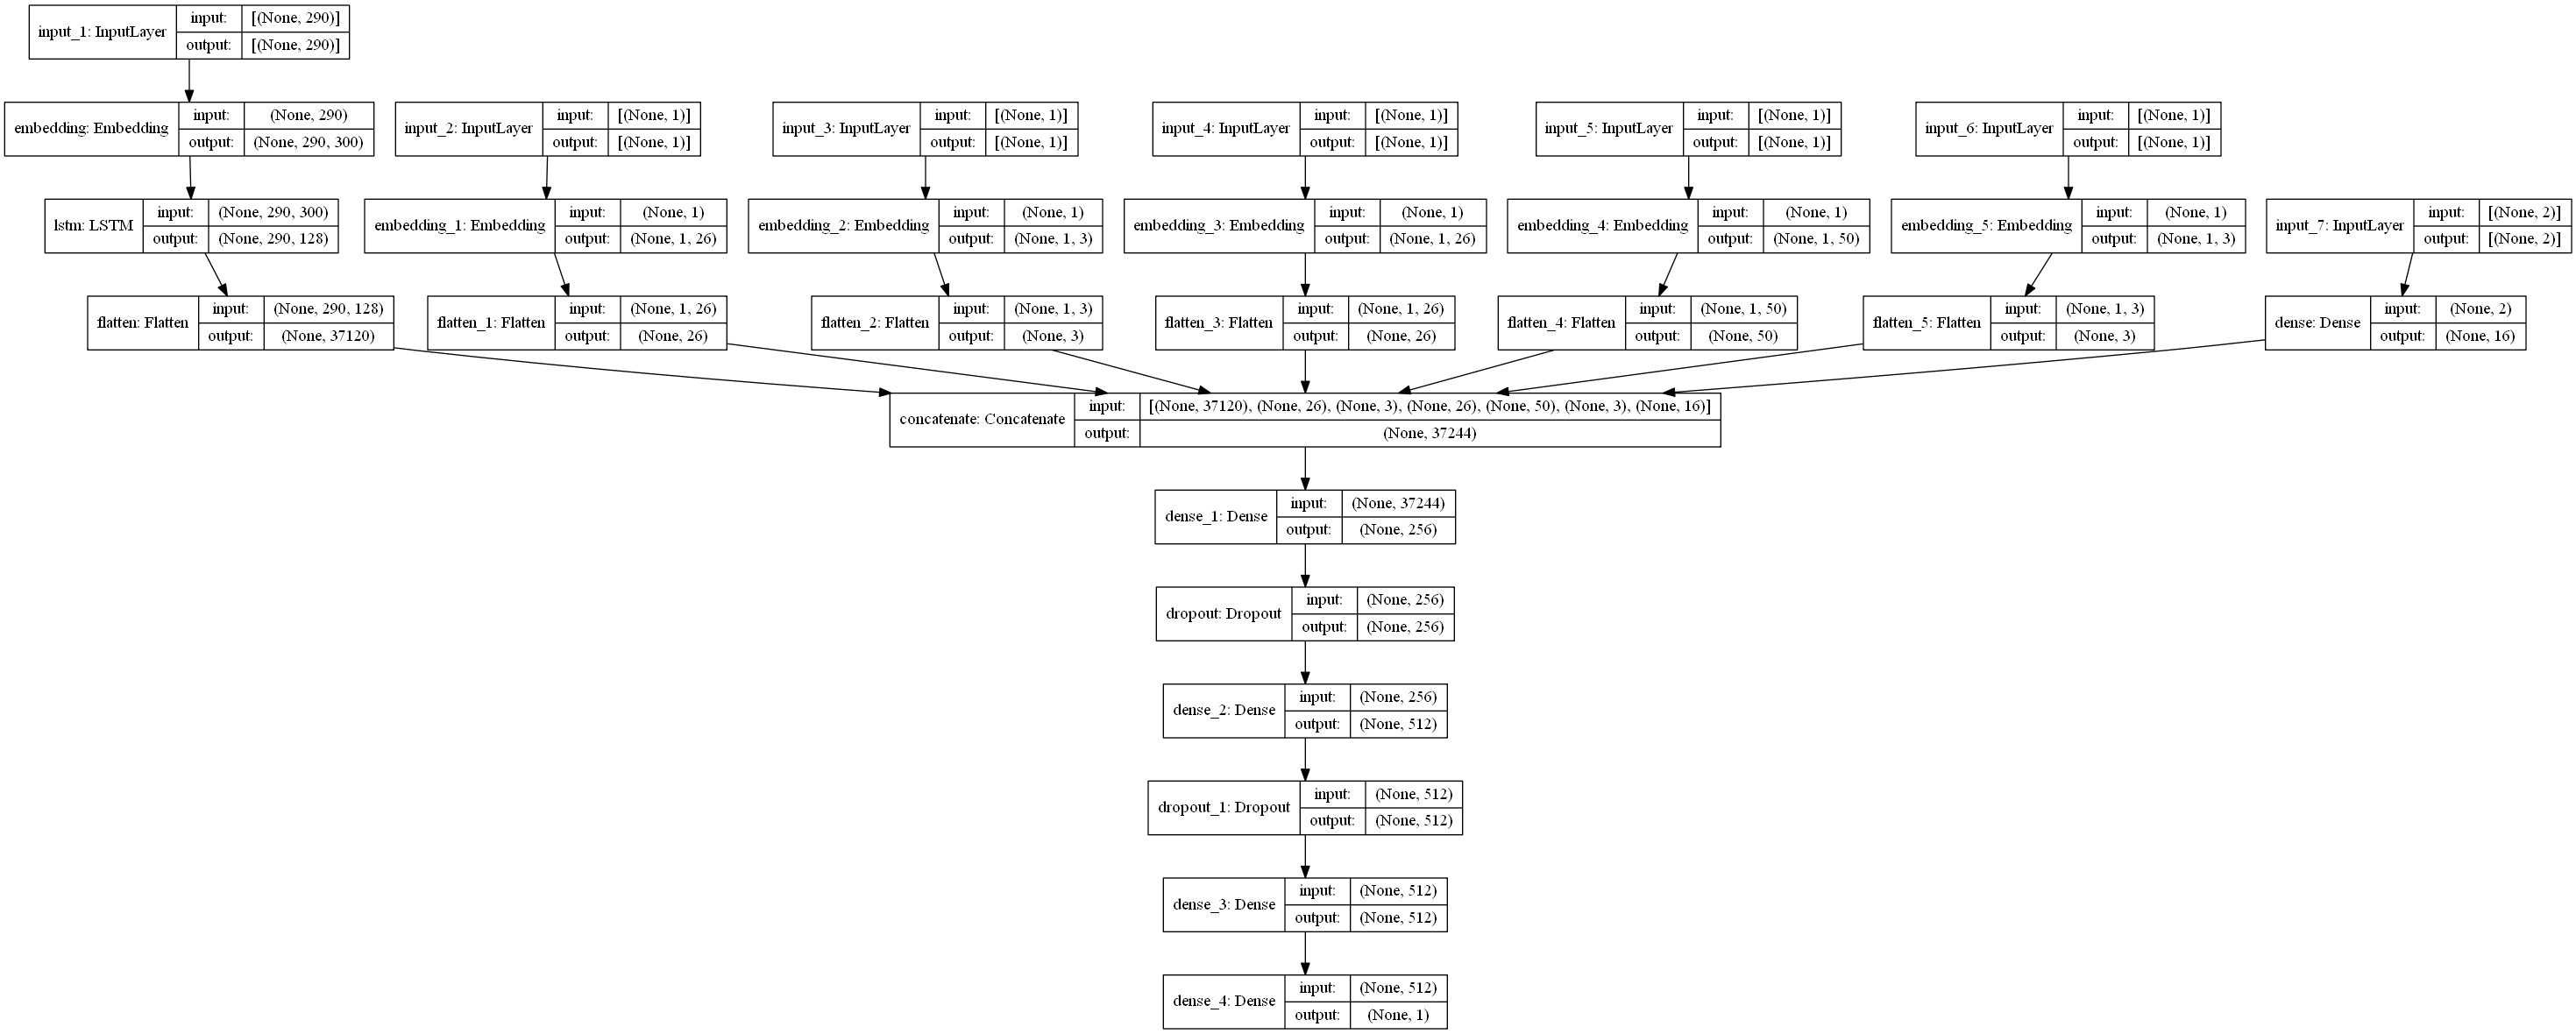

In [36]:
plot_model(model_two, to_file='model_two.png', show_shapes=True)

## 2.3 Compiling and fitting model two

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= ("logs/fits/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) \
                       ,histogram_freq=1,write_graph=True)


filepath="model_save/best_model_two.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_auc_2',  verbose=1, save_best_only=True, mode='max')
# defining mode as 'max' as val_auc_2 is a customm metric and we need to specify how to handle this metric

call_back_list = [checkpoint, tensorboard_callback]

In [38]:
model_two.compile(loss='binary_crossentropy', optimizer='adam',metrics=[auc_2])

train_inp = [train_padded_essay_idf, train_school_state_encoded, train_teacher_prefix_encoded, train_project_grade_category_encoded,
            train_clean_categories_encoded, train_clean_subcategories_encoded, train_numerical_features]

test_inp = [test_padded_essay_idf, test_school_state_encoded, test_teacher_prefix_encoded, test_project_grade_category_encoded,
           test_clean_categories_encoded, test_clean_subcategories_encoded, test_numerical_features]

model_two.fit(train_inp, y_train ,epochs=5, validation_data=(test_inp, y_test), 
              batch_size=512, callbacks=call_back_list)

Epoch 1/5
161/161 [==============================] - 35s 191ms/step - loss: 0.4372 - auc_2: 0.6680 - val_loss: 0.4523 - val_auc_2: 0.7233

Epoch 00001: val_auc_2 improved from -inf to 0.72331, saving model to model_save\best_model_two.hdf5
Epoch 2/5
161/161 [==============================] - 30s 183ms/step - loss: 0.3804 - auc_2: 0.7379 - val_loss: 0.4723 - val_auc_2: 0.7335

Epoch 00002: val_auc_2 improved from 0.72331 to 0.73346, saving model to model_save\best_model_two.hdf5
Epoch 3/5
161/161 [==============================] - 30s 184ms/step - loss: 0.3648 - auc_2: 0.7680 - val_loss: 0.4857 - val_auc_2: 0.7244

Epoch 00003: val_auc_2 did not improve from 0.73346
Epoch 4/5
161/161 [==============================] - 30s 184ms/step - loss: 0.3550 - auc_2: 0.7861 - val_loss: 0.4039 - val_auc_2: 0.7401

Epoch 00004: val_auc_2 improved from 0.73346 to 0.74008, saving model to model_save\best_model_two.hdf5
Epoch 5/5
161/161 [==============================] - 30s 184ms/step - loss: 0.3303 

#### Our final validation AUC for model one is 0.74 after 5 epochs

In [39]:
%tensorboard --logdir logs/fits

Reusing TensorBoard on port 6006 (pid 12492), started 2 days, 7:40:41 ago. (Use '!kill 12492' to kill it.)

### 2.4 Tensorboard image for model two

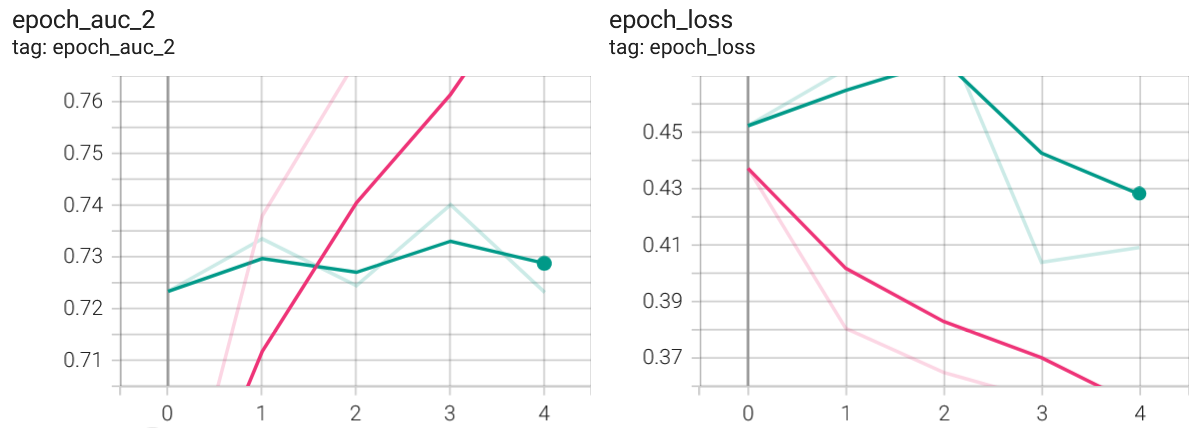

# <font color='red'> Model-3 </font>

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png

## 3.1 Vectorizing features other than text data

In [19]:
#in this model you can use the text vectorized data from model1 
#for other than text data consider the following steps
# you have to perform one hot encoding of categorical features. You can use onehotencoder() or countvectorizer() for the same.
# Stack up standardised numerical features and all the one hot encoded categorical features
#the input to conv1d layer is 3d, you can convert your 2d data to 3d using np.newaxis
# Note - deep learning models won't work with sparse features, you have to convert them to dense features before fitting in the model.

In [20]:
school_state_vectorizer = CountVectorizer()
school_state_vectorizer.fit(x_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_state_ohe = school_state_vectorizer.transform(x_train['school_state'].values)
x_test_state_ohe = school_state_vectorizer.transform(x_test['school_state'].values)

print("After vectorizations")
print(x_train_state_ohe.shape, y_train.shape)
print(x_test_state_ohe.shape, y_test.shape)
print(school_state_vectorizer.get_feature_names_out())
print("="*100)

After vectorizations
(81936, 51) (81936,)
(27312, 51) (27312,)
['ak' 'al' 'ar' 'az' 'ca' 'co' 'ct' 'dc' 'de' 'fl' 'ga' 'hi' 'ia' 'id'
 'il' 'in' 'ks' 'ky' 'la' 'ma' 'md' 'me' 'mi' 'mn' 'mo' 'ms' 'mt' 'nc'
 'nd' 'ne' 'nh' 'nj' 'nm' 'nv' 'ny' 'oh' 'ok' 'or' 'pa' 'ri' 'sc' 'sd'
 'tn' 'tx' 'ut' 'va' 'vt' 'wa' 'wi' 'wv' 'wy']


In [21]:
teacher_prefix_vectorizer = CountVectorizer()
teacher_prefix_vectorizer.fit(x_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_teacher_ohe = teacher_prefix_vectorizer.transform(x_train['teacher_prefix'].values)
x_test_teacher_ohe = teacher_prefix_vectorizer.transform(x_test['teacher_prefix'].values)

print("After vectorizations")
print(x_train_teacher_ohe.shape, y_train.shape)
print(x_test_teacher_ohe.shape, y_test.shape)
print(teacher_prefix_vectorizer.get_feature_names_out())
print("="*100)

After vectorizations
(81936, 5) (81936,)
(27312, 5) (27312,)
['dr' 'mr' 'mrs' 'ms' 'teacher']


In [22]:
project_grade_category_vectorizer = CountVectorizer()
project_grade_category_vectorizer.fit(x_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_grade_ohe = project_grade_category_vectorizer.transform(x_train['project_grade_category'].values)
x_test_grade_ohe = project_grade_category_vectorizer.transform(x_test['project_grade_category'].values)

print("After vectorizations")
print(x_train_grade_ohe.shape, y_train.shape)
print(x_test_grade_ohe.shape, y_test.shape)
print(project_grade_category_vectorizer.get_feature_names_out())
print("="*100)

After vectorizations
(81936, 4) (81936,)
(27312, 4) (27312,)
['grades_3_5' 'grades_6_8' 'grades_9_12' 'grades_prek_2']


In [23]:
clean_categories_vectorizer = CountVectorizer()
clean_categories_vectorizer.fit(x_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_categories_ohe = clean_categories_vectorizer.transform(x_train['clean_categories'].values)
x_test_categories_ohe = clean_categories_vectorizer.transform(x_test['clean_categories'].values)

print("After vectorizations")
print(x_train_categories_ohe.shape, y_train.shape)
print(x_test_categories_ohe.shape, y_test.shape)
print(clean_categories_vectorizer.get_feature_names_out())
print("="*100)

After vectorizations
(81936, 9) (81936,)
(27312, 9) (27312,)
['appliedlearning' 'care_hunger' 'health_sports' 'history_civics'
 'literacy_language' 'math_science' 'music_arts' 'specialneeds' 'warmth']


In [24]:
clean_subcategories_vectorizer = CountVectorizer()
clean_subcategories_vectorizer.fit(x_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_subcategories_ohe = clean_subcategories_vectorizer.transform(x_train['clean_subcategories'].values)
x_test_subcategories_ohe = clean_subcategories_vectorizer.transform(x_test['clean_subcategories'].values)

print("After vectorizations")
print(x_train_subcategories_ohe.shape, y_train.shape)
print(x_test_subcategories_ohe.shape, y_test.shape)
print(clean_subcategories_vectorizer.get_feature_names_out())
print("="*100)

After vectorizations
(81936, 30) (81936,)
(27312, 30) (27312,)
['appliedsciences' 'care_hunger' 'charactereducation' 'civics_government'
 'college_careerprep' 'communityservice' 'earlydevelopment' 'economics'
 'environmentalscience' 'esl' 'extracurricular' 'financialliteracy'
 'foreignlanguages' 'gym_fitness' 'health_lifescience' 'health_wellness'
 'history_geography' 'literacy' 'literature_writing' 'mathematics' 'music'
 'nutritioneducation' 'other' 'parentinvolvement' 'performingarts'
 'socialsciences' 'specialneeds' 'teamsports' 'visualarts' 'warmth']


In [25]:
scaler = StandardScaler()
scaler.fit(x_train['price'].values.reshape(-1,1))

x_train_price_norm = scaler.transform(x_train['price'].values.reshape(-1,1))
x_test_price_norm = scaler.transform(x_test['price'].values.reshape(-1,1))


print("After vectorizations")
print(x_train_price_norm.shape, y_train.shape)
print(x_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(81936, 1) (81936,)
(27312, 1) (27312,)


In [26]:
scaler = StandardScaler()
scaler.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

x_train_teacher_num_previous_projects_norm =scaler.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_test_teacher_num_previous_projects_norm = scaler.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_teacher_num_previous_projects_norm.shape, y_train.shape)
print(x_test_teacher_num_previous_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(81936, 1) (81936,)
(27312, 1) (27312,)


In [27]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
x_train_other = hstack((x_train_state_ohe, x_train_teacher_ohe, x_train_grade_ohe, x_train_categories_ohe, x_train_subcategories_ohe, x_train_price_norm, x_train_teacher_num_previous_projects_norm)).tocsr()
x_test_other = hstack((x_test_state_ohe, x_test_teacher_ohe, x_test_grade_ohe, x_test_categories_ohe, x_test_subcategories_ohe, x_test_price_norm , x_test_teacher_num_previous_projects_norm)).tocsr()
x_train_other = x_train_other.todense()
x_test_other = x_test_other.todense()
print(x_train_other.shape, x_test_other.shape)

(81936, 101) (27312, 101)


In [28]:
x_train_other = np.resize(x_train_other, (81936, 101,1))
x_test_other = np.resize(x_test_other, (27312, 101,1))

In [29]:
print(x_train_other.shape, x_test_other.shape)

(81936, 101, 1) (27312, 101, 1)


## 3.2 Define model three

In [30]:
# input text layer and text embedding layer
tf.keras.backend.clear_session()
input_layer_text = Input(shape=(maxlen),)
embedding_layer_text = Embedding(input_dim = vocab_size, output_dim = 300, weights = [embedding_matrix], 
                            input_length=maxlen, trainable=False) (input_layer_text) # We used 300d 
                                                                                     # glove vector

lstm = LSTM(128, return_sequences = True) (embedding_layer_text)    # return_sequences should be true when stacking
                                                                    # LSTM units in LSTM layer

flat_text = Flatten() (lstm)

# input other than text data

other_than_text_input = Input(shape=(101,1,))
conv_1 = Conv1D(32, 3, activation = 'relu', kernel_initializer='HeUniform') (other_than_text_input)
conv_2 = Conv1D(32, 3, activation = 'relu', kernel_initializer='HeUniform') (conv_1)

flat_other_than_text_input = Flatten() (conv_2)



concatenate_1 = Concatenate()([flat_text, flat_other_than_text_input])
dense_after_concat_1  = Dense(256,activation='relu', kernel_initializer='HeUniform')(concatenate_1)


batch_norm = BatchNormalization() (dense_after_concat_1)
dropout_1 = Dropout(0.5) (batch_norm)


dense_after_concat_2 = Dense(512,activation='relu', kernel_initializer='HeUniform')(dropout_1)

dropout_2 = Dropout(0.5) (dense_after_concat_2)

dense_after_concat_3 = Dense(512,activation='relu', kernel_initializer='HeUniform')(dropout_2)

output_three = Dense(1,activation='sigmoid')(dense_after_concat_3)

model_three = Model(inputs=[input_layer_text, other_than_text_input], outputs=output_three)
model_three.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 339)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 101, 1)]     0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 339, 300)     15075900    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 99, 32)       128         input_2[0][0]                    
______________________________________________________________________________________________

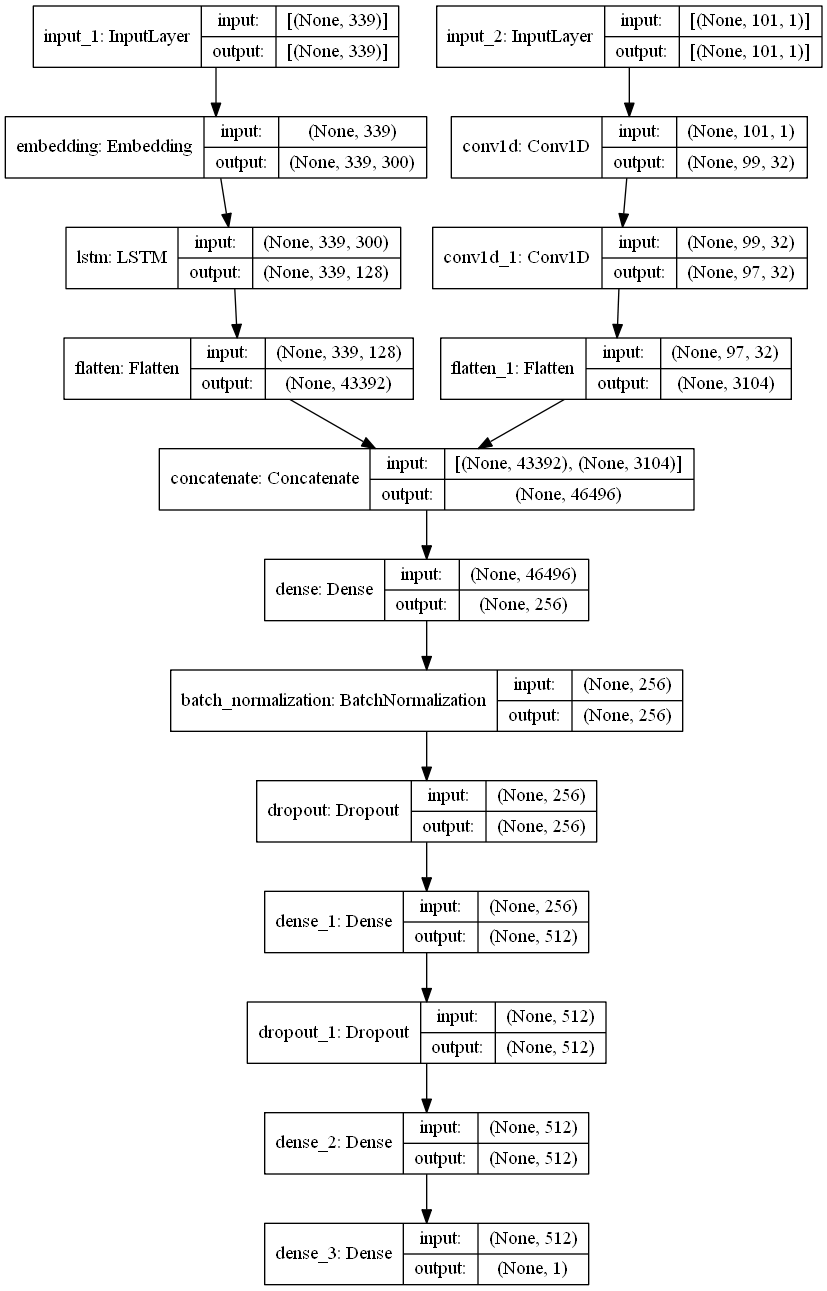

In [31]:
plot_model(model_three, to_file='model_three.png', show_shapes=True)

## 3.3 Compiling and fitting model three

In [32]:
#define custom auc as metric , do not use tf.keras.metrics
# https://stackoverflow.com/a/46844409 - custom AUC reference 1
# https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807  - custom AUC reference 2
# compile and fit your model

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= ("logs/fits/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) \
                       ,histogram_freq=1,write_graph=True)


filepath="model_save/best_model_three.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_auc_2',  verbose=1, save_best_only=True, mode='max')
# defining mode as 'max' as val_auc_2 is a customm metric and we need to specify how to handle this metric

call_back_list = [checkpoint, tensorboard_callback]

In [34]:
model_three.compile(loss='binary_crossentropy', optimizer='adam',metrics=[auc_2])

train_inp = [train_padded_essay, x_train_other]

test_inp = [test_padded_essay, x_test_other]

model_three.fit(train_inp, y_train ,epochs=5, validation_data=(test_inp, y_test), 
              batch_size=512, callbacks=call_back_list)

Epoch 1/5
161/161 [==============================] - 39s 213ms/step - loss: 0.4466 - auc_2: 0.6370 - val_loss: 0.3938 - val_auc_2: 0.7190

Epoch 00001: val_auc_2 improved from -inf to 0.71901, saving model to model_save\best_model_three.hdf5
Epoch 2/5
161/161 [==============================] - 33s 206ms/step - loss: 0.3910 - auc_2: 0.7211 - val_loss: 0.3833 - val_auc_2: 0.7438

Epoch 00002: val_auc_2 improved from 0.71901 to 0.74384, saving model to model_save\best_model_three.hdf5
Epoch 3/5
161/161 [==============================] - 33s 204ms/step - loss: 0.3765 - auc_2: 0.7441 - val_loss: 0.3771 - val_auc_2: 0.7486

Epoch 00003: val_auc_2 improved from 0.74384 to 0.74858, saving model to model_save\best_model_three.hdf5
Epoch 4/5
161/161 [==============================] - 33s 205ms/step - loss: 0.3610 - auc_2: 0.7718 - val_loss: 0.3889 - val_auc_2: 0.7536

Epoch 00004: val_auc_2 improved from 0.74858 to 0.75358, saving model to model_save\best_model_three.hdf5
Epoch 5/5
161/161 [====

#### Our final validation AUC for model three is 0.7536 after 5 epochs

In [35]:
%tensorboard --logdir logs/fits

Reusing TensorBoard on port 6006 (pid 12492), started 1 day, 10:03:37 ago. (Use '!kill 12492' to kill it.)

## 3.4 Tensorboard image for model three

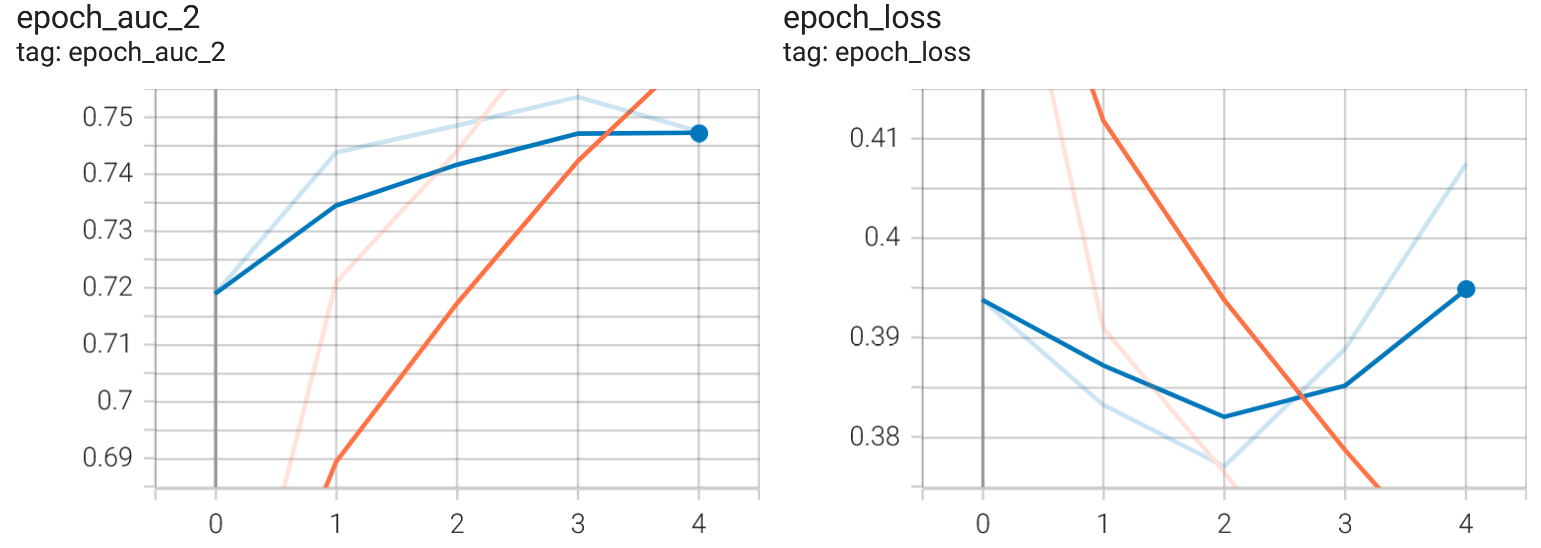

In [54]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Model", "Epochs", "val_accuracy"]

x.add_row(["model_one", "5","0.7618"])
x.add_row(["model_two", "5","0.74"])
x.add_row(["model_three", "5","0.7536"])

print(x)

+-------------+--------+--------------+
|    Model    | Epochs | val_accuracy |
+-------------+--------+--------------+
|  model_one  |   5    |    0.7618    |
|  model_two  |   5    |     0.74     |
| model_three |   5    |    0.7536    |
+-------------+--------+--------------+
